In [20]:
graph = {
  'a' : ['b', 'c'],
  'b' : ['a', 'd'], 
  'c' : ['a', 'd'],
  'd' : ['b', 'c', 'e'],
  'e' : ['d']
}

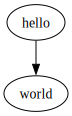

In [21]:
import graphviz
d = graphviz.Digraph()
d.edge("hello", "world")
d

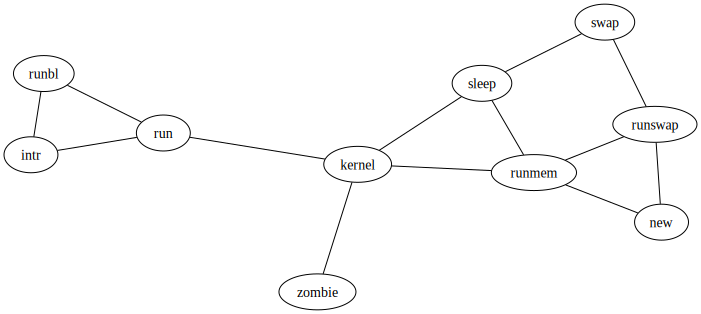

In [22]:
import graphviz

g = graphviz.Graph('G', filename='process.gv', engine='sfdp')

g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g.edge('run', 'kernel')
g.edge('kernel', 'zombie')
g.edge('kernel', 'sleep')
g.edge('kernel', 'runmem')
g.edge('sleep', 'swap')
g.edge('swap', 'runswap')
g.edge('runswap', 'new')
g.edge('runswap', 'runmem')
g.edge('new', 'runmem')
g.edge('sleep', 'runmem')
g

In [23]:
graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

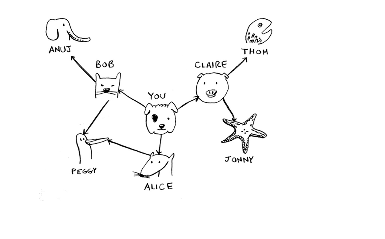

In [24]:
from graphviz import Digraph, Graph

In [25]:
def trace(root, graph):
     # builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in graph[v]:
                if not (v, child) in edges:
                    edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root, graph, is_directed = False):
    if is_directed:
        dot = Digraph(format='svg', engine='sfdp')
    else:
        dot = Graph(format='svg', engine='sfdp')
    nodes, edges = trace(root, graph)
    for n in nodes:
        dot.node(n)
    for n1, n2 in edges:
        dot.edge(n1, n2)
    return dot

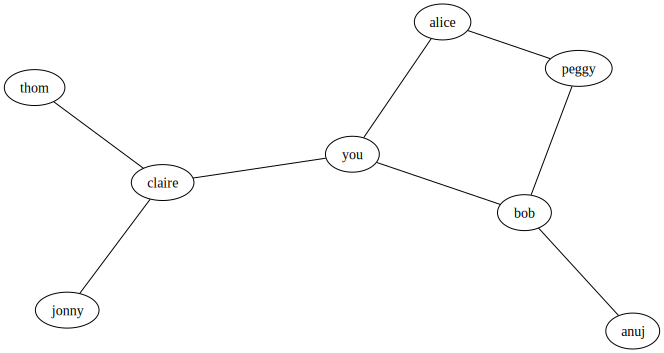

In [26]:
draw_dot("you", graph)

In [27]:
graph = {
  'A': ['B', 'D'],
  'B': ['A', 'C', 'E'],
  'C': ['B'],
  'D': ['A', 'E'],
  'E': ['B', 'D', 'F'],
  'F': ['E'],
}


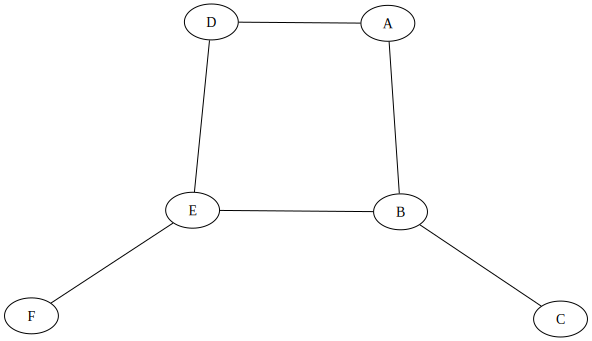

In [28]:
draw_dot("A", graph, False)

In [29]:
from collections import deque

In [30]:
def bfs(graph, start, end):
     visited = [start]

     queue = deque([(start, [start])])
     while (queue):
          node, path = queue.popleft()
          for neighbor in graph[node]:
               if neighbor == end:             
                    return path + [neighbor]
               if neighbor not in visited:
                    visited.append(neighbor)
                    queue.append((neighbor,path + [neighbor]))
                    # print(neighbor, path)

bfs(graph, "A", "C")


['A', 'B', 'C']

In [31]:
smol_graph  = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['E'],
}

In [32]:
class Node:
    def __init__(self, value):
        self.value = value
        self.edges = []
        self.visited = False
        self.parent = None
    
    def add_edge(self, other):
        
        self.edges.append(other)
        # other.edges.add(self)
        
    def reset(self):
        self.visited = False
        self.parent = None

    def __repr__(self):
        return str(self.value) 

In [33]:
class Graph:
    def __init__(self):
        self.graph = {}
    
    def add_node(self, node):
        if not isinstance(node,Node):
            node = Node(node)
        value = node.value
        # if not value in self.graph:
        self.graph[value] = node
        return node
    
    def get_node(self, node):
        return self.graph.get(node, None)
    
    def __repr__(self):
        pass
    
    def reset(self):
        for node in self.graph:
            self.get_node(node).reset()

In [34]:
graph = Graph()
for key in smol_graph:
    node = graph.get_node(key)
    if node == None:
        node = graph.add_node(key)

    for child in smol_graph[node.value]:
        child_node = graph.get_node(child)
        if child_node == None:
            child_node = graph.add_node(child) 
        node.add_edge(child_node)

In [35]:
def bfs(graph, source, dest):
    # graph.reset()
    queue = deque([graph.graph[source]])
    while len(queue) >0:
        node = queue.popleft()
        node.visited = True
        for edge in node.edges:
            if  edge.visited == False:
                queue.append(edge)
                edge.visited = True
                edge.parent = node
                if edge.value == dest:
                    print("Found!!")
                    path = []
                    while edge:
                        path.append(edge)
                        temp = edge 
                        edge = edge.parent
                        temp.reset()
                    return path

                        
bfs(graph, "A", "C")

Found!!


[C, B, A]